In [1]:
#import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("US_Accidents_May19.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
#df = df.dropna()
df.head()
df.shape

(2243939, 49)

In [3]:
df.count()

ID                       2243939
Source                   2243939
TMC                      1727177
Severity                 2243939
Start_Time               2243939
End_Time                 2243939
Start_Lat                2243939
Start_Lng                2243939
End_Lat                   516762
End_Lng                   516762
Distance(mi)             2243939
Description              2243938
Number                    785537
Street                   2243939
Side                     2243939
City                     2243871
County                   2243939
State                    2243939
Zipcode                  2243293
Country                  2243939
Timezone                 2241798
Airport_Code             2220275
Weather_Timestamp        2196769
Temperature(F)           2181674
Wind_Chill(F)             391569
Humidity(%)              2179472
Pressure(in)             2186659
Visibility(mi)           2172579
Wind_Direction           2196749
Wind_Speed(mph)          1800985
Precipitat

In [4]:
#df.dtypes

### Data Clean-up

### Simplify weather condition column

In [5]:
# simplify weather condition column
df["Weather_Condition"]=df["Weather_Condition"].replace(to_replace =["Overcast", "Mostly Cloudy", "Scattered Clouds","Funnel Cloud", "Partly Cloudy" ],  
                            value ="Cloudy") 

# simplify weather condition column
df["Weather_Condition"]=df["Weather_Condition"].replace(to_replace =["Fog", "Shallow Fog", "Patches of Fog","Light Freezing Fog",
                                                                     "Light Fog", "Haze", "Light Haze"],  
                            value ="Fog") 

# simplify weather condition column
df["Weather_Condition"]=df["Weather_Condition"].replace(to_replace =["Hail", "Small Hail", "Light Hail"],  
                            value ="Hail") 


df["Weather_Condition"]=df["Weather_Condition"].replace(to_replace =["Light Rain", "Rain", "Light Freezing Drizzle","Light Drizzle", "Light Freezing Rain",
                           "Drizzle", "Light Rain Showers", "Light Thunderstorms and Rain", "Thunderstorms and Rain",
                          "Rain Showers","Heavy Drizzle","Squalls","Heavy Freezing Drizzle","Heavy Freezing Rain", "Heavy Rain Showers","ßHeavy Rain"],  
                            value ="Rain") 

df["Weather_Condition"]=df["Weather_Condition"].replace(to_replace =["Heavy Thunderstorms and Rain", 
                                                                     "Heavy Thunderstorms and Snow",
                                                                     "Heavy Thunderstorms with Small Hail",
                                                                     "Light Thunderstorm","Thunderstorms and Snow"
                                                                     ],  
                            value ="Thunderstorm") 


df["Weather_Condition"]=df["Weather_Condition"].replace(to_replace =["Light Ice Pellets", "Ice Pellets"],  
                            value ="Ice") 

df["Weather_Condition"]=df["Weather_Condition"].replace(to_replace =["Blowing Sand"],  
                            value ="Sand") 


df["Weather_Condition"]=df["Weather_Condition"].replace(to_replace =["Light Snow", "Snow",
                                                                     "Blowing Snow","Light Thunderstorms and Snow",
                                                                     "Low Drifting Snow","Low Drifting Snow",
                                                                     "Snow Grains", "Snow Showers",
                                                                     "Light Snow Showers","Light Blowing Snow",
                                                                     "Light Snow Grains", "Heavy Blowing Snow"],  
                                                        value ="Snow") 


df["Weather_Condition"]=df["Weather_Condition"].replace(to_replace =["Widespread Dust", "Dust Whirls"],  
                            value ="Dust") 

#### Column and Duration Clean-up

In [6]:
#remove columns with the least amount of information
df_charts=df.drop(["End_Lat", "End_Lng", "Number", "Wind_Chill(F)", "Precipitation(in)", "Source", "TMC"], axis=1)

#remove times where end time is less than start time 
wrong_times= df_charts[ df_charts.Start_Time > df_charts.End_Time]
wrong_times.index

df_charts=df_charts.drop([69720, 69722, 309389, 309390, 746173, 2038017])



In [7]:
#df_charts = df.dropna()
#1780148
df_charts.replace(' ', np.nan, inplace=True)
df_charts = df_charts.dropna()
#df_charts.count()
#count is 1369222


import datetime
from datetime import datetime

#format date column into date type
df_charts['Start_Time']= pd.to_datetime(df_charts['Start_Time'], format='%Y-%m-%d %H:%M:%S')
df_charts['End_Time']= pd.to_datetime(df_charts['End_Time'], format='%Y-%m-%d %H:%M:%S')

#difference in minutes 
df_charts['diff_minutes'] = df_charts['End_Time'] - df_charts['Start_Time']
df_charts['diff_minutes'] = df_charts['diff_minutes']/np.timedelta64(1,'m') 
 

df_charts['diff_minutes']= df_charts['diff_minutes'].round()
                                          
                                          
#difference in hourse 
df_charts['diff_hours'] = df_charts['End_Time'] - df_charts['Start_Time']
df_charts['diff_hours'] = df_charts['diff_hours']/np.timedelta64(1,'h')



print(df_charts.shape)
#df_charts

(1780148, 44)


In [8]:
df_charts['datehour'] = df_charts['Start_Time'].dt.hour  
df_charts['dateminute'] = df_charts['Start_Time'].dt.minute
df_charts['datemonth'] = df_charts['Start_Time'].dt.month



In [9]:
# add season variables


def lookupSeason(num):
    if num in [12, 1, 2]:
        return 'Winter'
    elif num in [3, 4 ,5]:
        return 'Spring'
    elif num in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_charts['Season'] = df_charts['datemonth'].apply(lookupSeason)


#add time of day variables 

#df_charts

In [10]:
#add time day features

def lookupTimeOfDay(num):
    if 6 <= num <= 9:
        return 'Morning Rush'
    elif 10 <= num <= 12:
        return 'Lunch'
    elif 13 <= num <= 15:
        return 'Afternoon'
    elif 16 <= num <= 19:
        return 'COB Rush'
    elif 20 <= num <= 23:
        return 'Evening'
    else:
        return 'Night'

df_charts['TimeOfDay'] = df_charts['datehour'].apply(lookupTimeOfDay)

#df_charts

In [11]:
df_charts.State.unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'TN', 'NC', 'MN', 'KS',
       'OK', 'LA', 'CO', 'UT', 'AZ', 'NM', 'VT', 'MS', 'AR', 'NV', 'ME',
       'ND', 'WY', 'ID', 'SD', 'MT'], dtype=object)

In [12]:
#add regions by state
regions_df = pd.read_csv("regions.csv")


df_charts= pd.merge(df_charts, regions_df, on='State', how='left')

df_charts

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,...,diff_hours,datehour,dateminute,datemonth,Season,TimeOfDay,State_Long,Region,Division,Climate_Region
0,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,...,0.50,6,49,2,Winter,Morning Rush,Ohio,Midwest,East North Central,Central
1,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,...,0.50,7,23,2,Winter,Morning Rush,Ohio,Midwest,East North Central,Central
2,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,R,...,0.50,7,39,2,Winter,Morning Rush,Ohio,Midwest,East North Central,Central
3,A-6,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.010,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,R,...,0.50,7,44,2,Winter,Morning Rush,Ohio,Midwest,East North Central,Central
4,A-7,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.000,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,R,...,0.50,7,59,2,Winter,Morning Rush,Ohio,Midwest,East North Central,Central
5,A-8,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,0.010,Accident on I-75 Southbound at Exit 54B Grand ...,N Main St,R,...,0.50,7,59,2,Winter,Morning Rush,Ohio,Midwest,East North Central,Central
6,A-9,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,0.000,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,L,...,0.50,8,0,2,Winter,Morning Rush,Ohio,Midwest,East North Central,Central
7,A-10,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,0.010,Right hand shoulder blocked due to accident on...,Westerville Rd,R,...,0.50,8,10,2,Winter,Morning Rush,Ohio,Midwest,East North Central,Central
8,A-11,3,2016-02-08 08:14:42,2016-02-08 08:44:42,39.952812,-83.119293,0.010,Accident on I-270 Outerbelt Northbound at Exit...,Outerbelt S,R,...,0.50,8,14,2,Winter,Morning Rush,Ohio,Midwest,East North Central,Central
9,A-12,3,2016-02-08 08:21:27,2016-02-08 08:51:27,39.932709,-82.830910,0.010,One lane blocked due to accident on I-70 Westb...,I-70 E,R,...,0.50,8,21,2,Winter,Morning Rush,Ohio,Midwest,East North Central,Central


In [13]:
df_charts.Climate_Region.unique()

array(['Central', 'West', 'Southeast', 'North Central', 'Midwest',
       'Northeast', 'South', 'Northwest', 'South East', 'Southwest'],
      dtype=object)

In [14]:
#df_charts=df_charts.drop([69720, 69722, 309389, 309390, 746173, 2038017])


#remove times where end time is less than start time 
df_charts= df_charts[df_charts.diff_minutes < 720]


#756 accidents took more than 24 hours 1440
# 581accidents took more than 48 hours 2880
# 1137 took more than 12 hours

In [15]:
df_charts.shape

(1778996, 53)

In [16]:
data = df_charts[['Severity','diff_minutes']]
correlation = data.corr(method='pearson')
correlation
#diff_minutes corrrlation is 0.038772


,Severity,diff_minutes
Severity,1.000000,0.038662
diff_minutes,0.038662,1.000000


## Clean up duration 

In [17]:
df_charts.diff_minutes.describe().round()

count    1778996.0
mean          96.0
std          123.0
min            6.0
25%           30.0
50%           31.0
75%           60.0
max          718.0
Name: diff_minutes, dtype: float64

In [18]:
# if df_charts.diff_minutes >= 29 and =<31


mask = (df_charts['diff_minutes']  >= 29) & (df_charts['diff_minutes'] <= 31)
df_charts['diff_minutes'][mask] = 30

df_charts.diff_minutes.describe().round()

count    1778996.0
mean          96.0
std          123.0
min            6.0
25%           30.0
50%           30.0
75%           60.0
max          718.0
Name: diff_minutes, dtype: float64

In [19]:
#df_charts.to_csv("charts_data_model_2.csv",index=False)

### Making Charts

In [20]:
df1=df_charts.groupby('Weather_Condition').count().sort_values(['Severity'],ascending=False)
df1.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,...,diff_hours,datehour,dateminute,datemonth,Season,TimeOfDay,State_Long,Region,Division,Climate_Region
Weather_Condition,,,,,,,,,,,,,,,,,,,,,
Cloudy,947943,947943,947943,947943,947943,947943,947943,947943,947943,947943,...,947943,947943,947943,947943,947943,947943,947943,947943,947943,947943
Clear,614531,614531,614531,614531,614531,614531,614531,614531,614531,614531,...,614531,614531,614531,614531,614531,614531,614531,614531,614531,614531
Rain,134112,134112,134112,134112,134112,134112,134112,134112,134112,134112,...,134112,134112,134112,134112,134112,134112,134112,134112,134112,134112
Snow,36829,36829,36829,36829,36829,36829,36829,36829,36829,36829,...,36829,36829,36829,36829,36829,36829,36829,36829,36829,36829
Fog,26399,26399,26399,26399,26399,26399,26399,26399,26399,26399,...,26399,26399,26399,26399,26399,26399,26399,26399,26399,26399


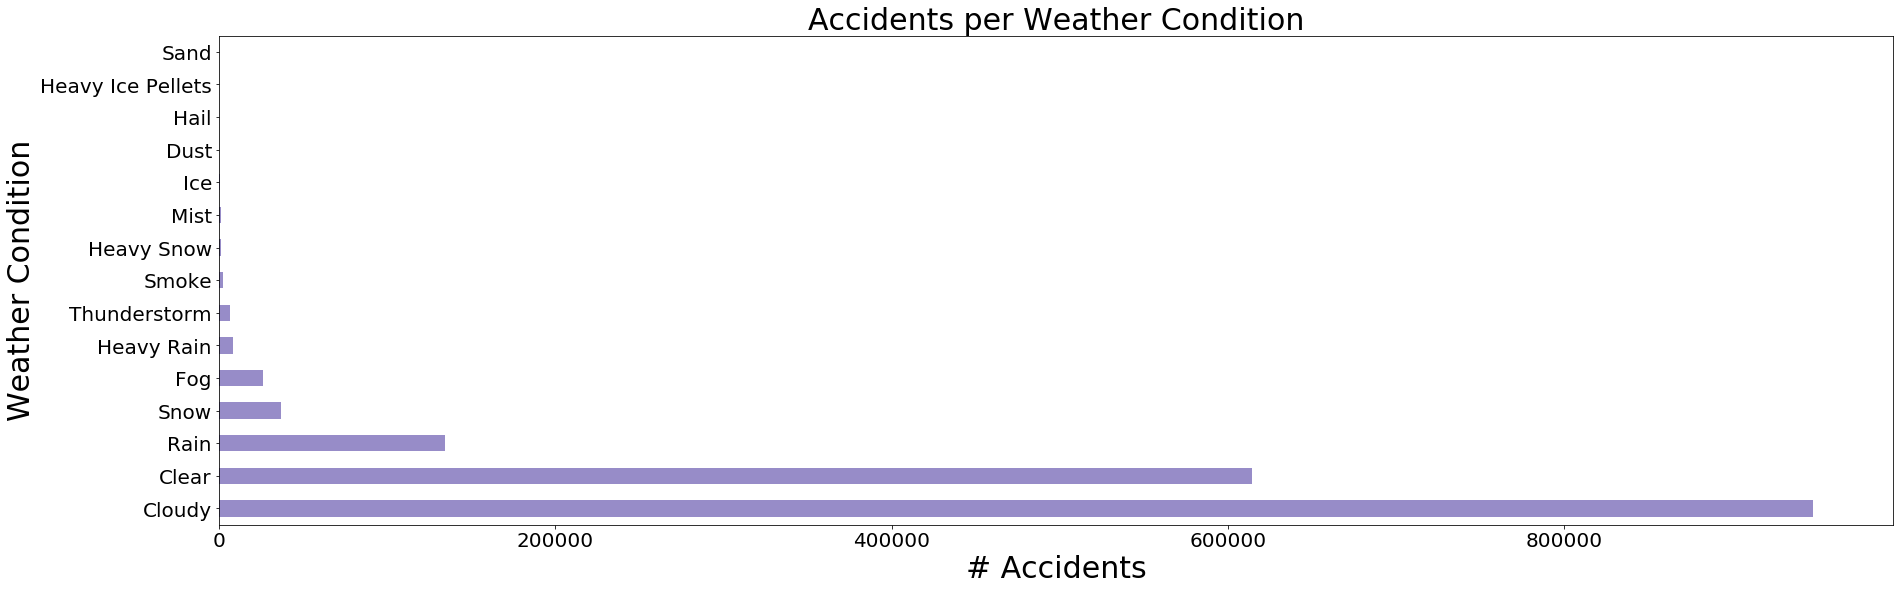

<Figure size 432x288 with 0 Axes>

In [21]:
df1['Severity'].plot(kind="barh", figsize=(30,9), align='center', alpha=0.5, color= "#311B92" , fontsize=20)

# Set a title for the chart
plt.title("Accidents per Weather Condition", fontsize=30)
plt.ylabel('Weather Condition', fontsize=30)
plt.xlabel('# Accidents', fontsize=30)


plt.show()
plt.tight_layout()

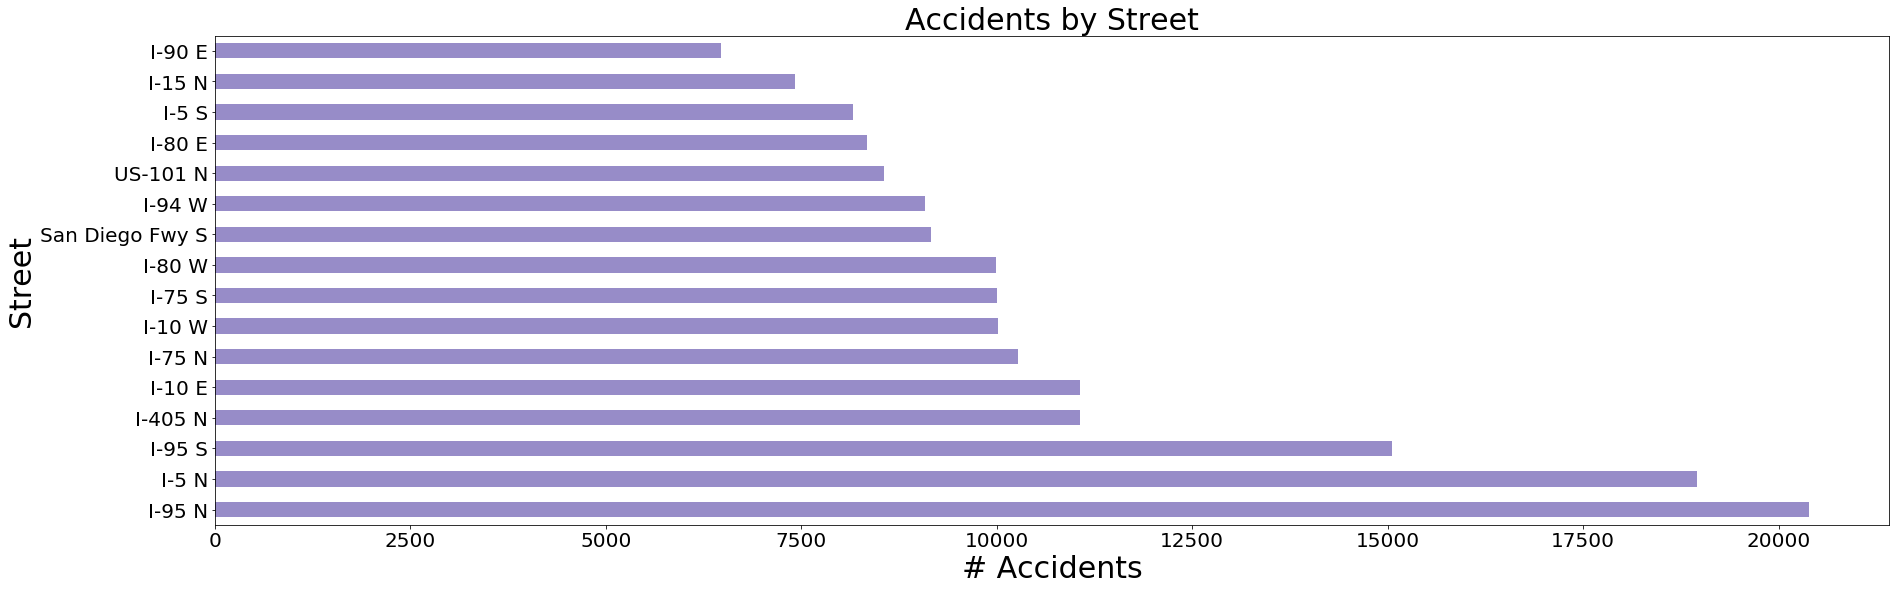

<Figure size 432x288 with 0 Axes>

In [22]:
df2=df_charts.groupby(['Street']).count().sort_values(['Severity'],ascending=False)
df2_filtered = df2[(df2.Severity >= 5000)]


df2_filtered['Severity'].plot(kind="barh", figsize=(30,9), align='center', alpha=0.5, color= "#311B92" , fontsize=20)



# Set a title for the chart
plt.title("Accidents by Street", fontsize=30)
plt.ylabel('Street', fontsize=30)
plt.xlabel('# Accidents', fontsize=30)


plt.show()
plt.tight_layout()


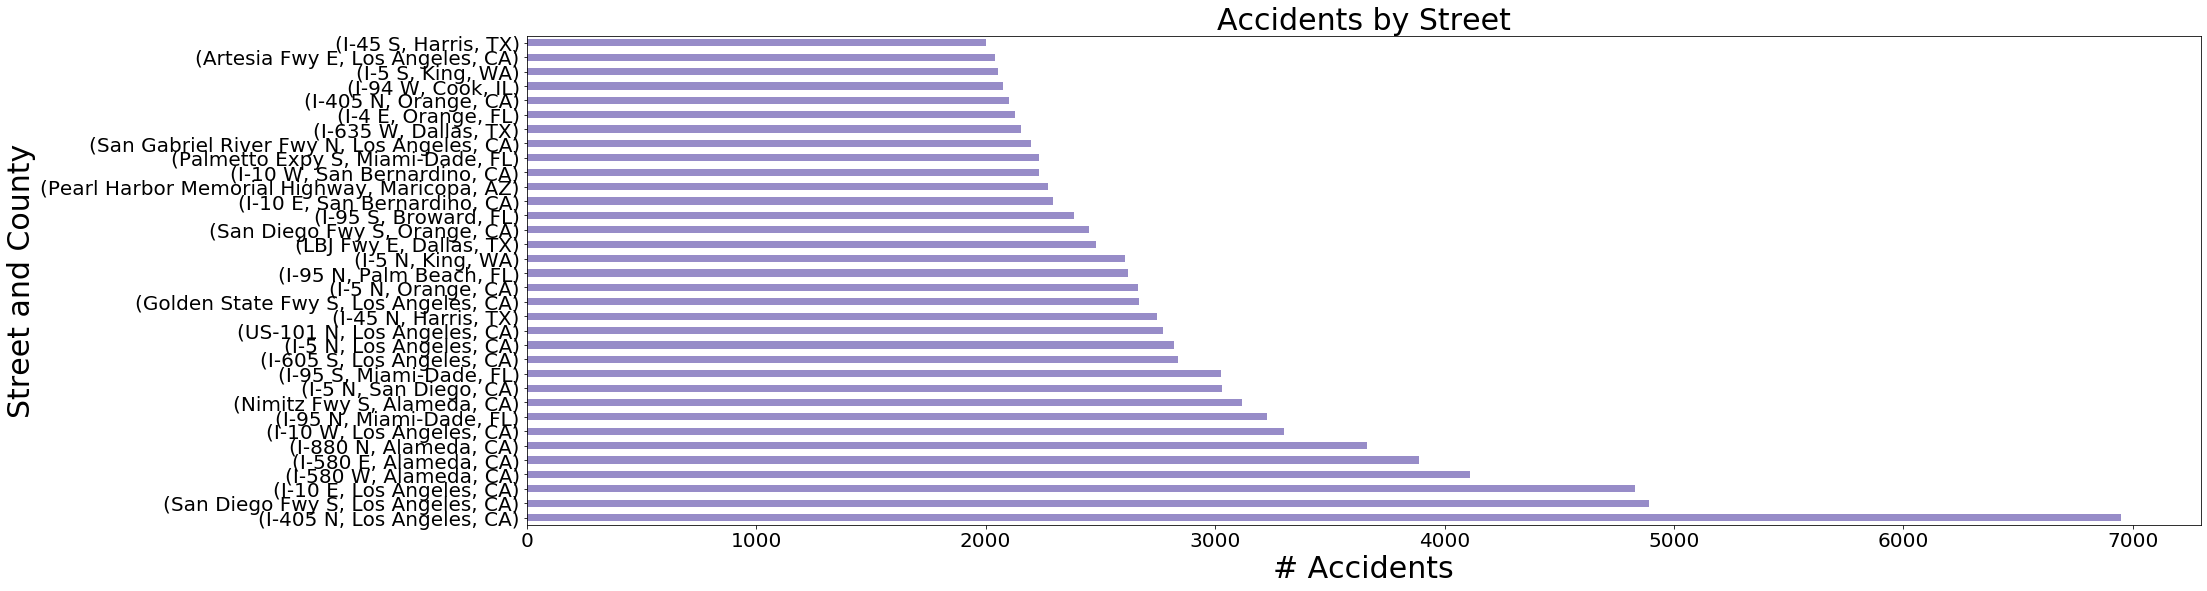

<Figure size 432x288 with 0 Axes>

In [23]:
df3=df_charts.groupby(['Street','County','State']).count().sort_values(['Severity'],ascending=False)
df3_filtered = df3[(df3.Severity >= 2000)]


df3_filtered['Severity'].plot(kind="barh", figsize=(30,9), align='center', alpha=0.5, color= "#311B92" , fontsize=20)



# Set a title for the chart
plt.title("Accidents by Street", fontsize=30)
plt.ylabel('Street and County', fontsize=30)
plt.xlabel('# Accidents', fontsize=30)


plt.show()
plt.tight_layout()

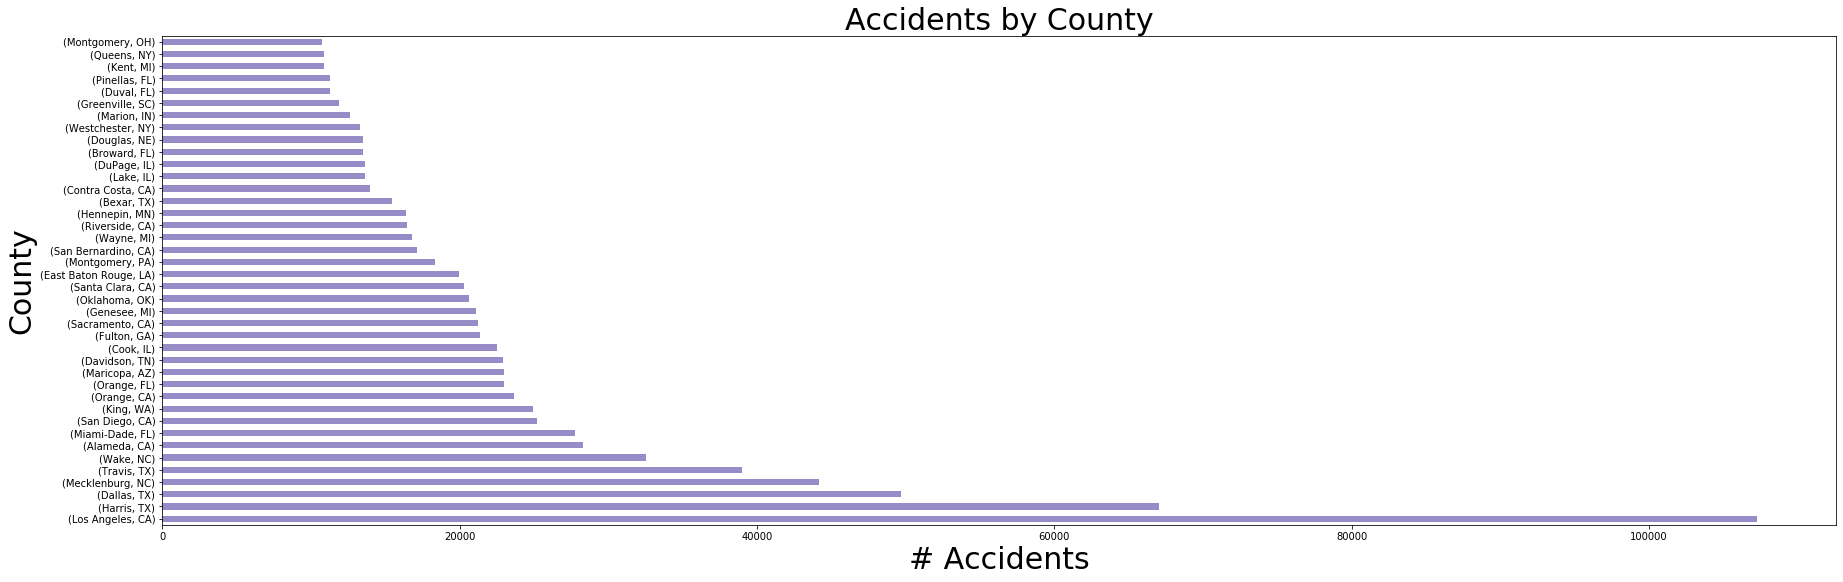

<Figure size 432x288 with 0 Axes>

In [24]:
df4=df_charts.groupby(['County','State']).count().sort_values(['Severity'],ascending=False)
df4_filtered = df4[(df4.Severity >= 10000)]


df4_filtered['Severity'].plot(kind="barh", figsize=(30,9), align='center', alpha=0.5, color= "#311B92" , fontsize=10)



# Set a title for the chart
plt.title("Accidents by County", fontsize=30)
plt.ylabel('County', fontsize=30)
plt.xlabel('# Accidents', fontsize=30)


plt.show()
plt.tight_layout()

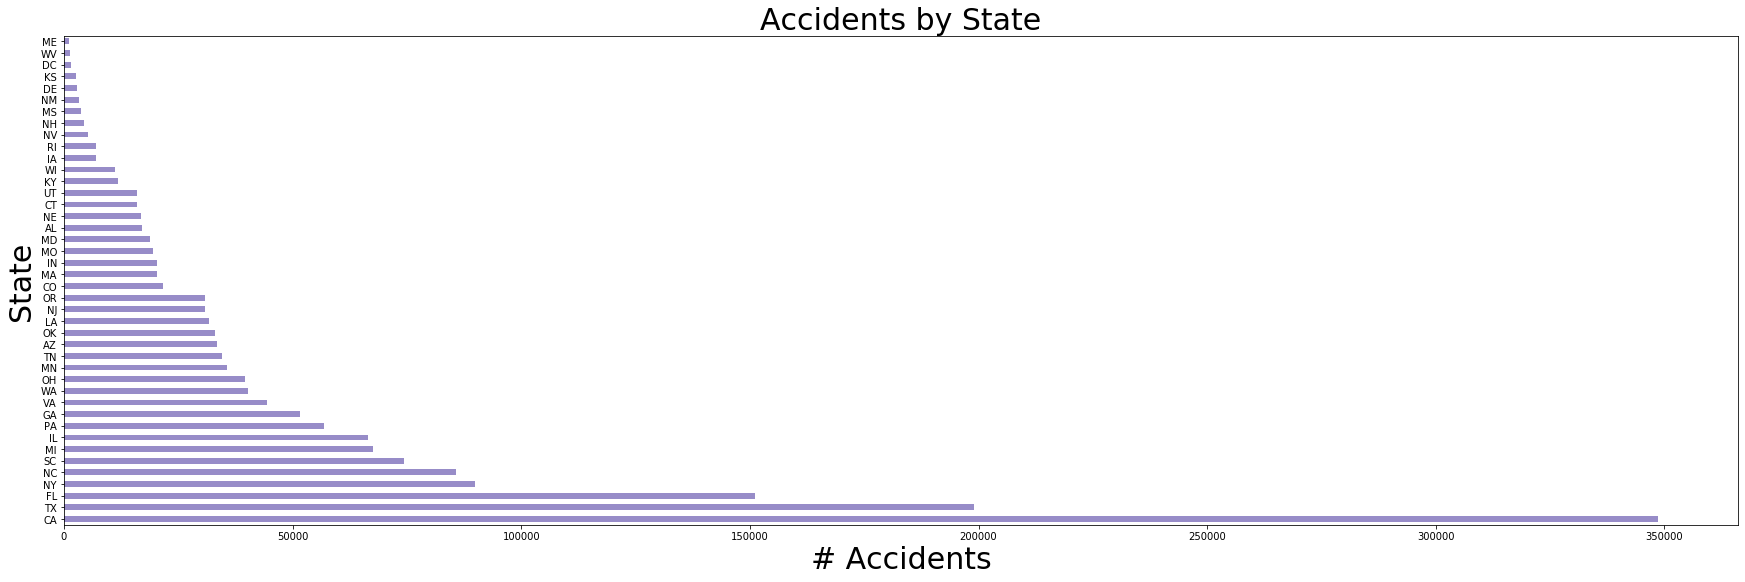

<Figure size 432x288 with 0 Axes>

In [25]:
df5=df_charts.groupby(['State']).count().sort_values(['Severity'],ascending=False)
df5_filtered = df5[(df5.Severity >= 1000)]


df5_filtered['Severity'].plot(kind="barh", figsize=(30,9), align='center', alpha=0.5, color= "#311B92" , fontsize=10)



# Set a title for the chart
plt.title("Accidents by State", fontsize=30)
plt.ylabel('State', fontsize=30)
plt.xlabel('# Accidents', fontsize=30)


plt.show()
plt.tight_layout()

2    1158091
3     566398
4      53845
1        645
0         17
Name: Severity, dtype: int64


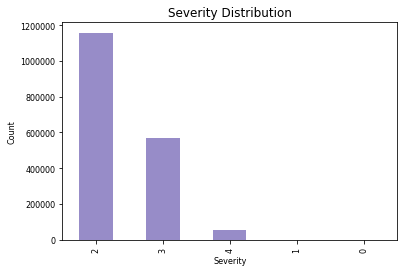

<Figure size 432x288 with 0 Axes>

In [26]:
print(df_charts.Severity.value_counts())
severity_chart=df_charts.Severity.value_counts()


severity_chart.plot(kind="bar", figsize=(6,4), align='center', alpha=0.5, color= "#311B92" , fontsize=8)

# Set a title for the chart
plt.title("Severity Distribution", fontsize=12)
plt.ylabel('Count', fontsize=8)
plt.xlabel('Severity', fontsize=8)


plt.show()
plt.tight_layout()

#counts when accidents over 12 hours have been removed 
# 2    1158291
# 3     566468
# 4      53969
# 1        645
# 0         17

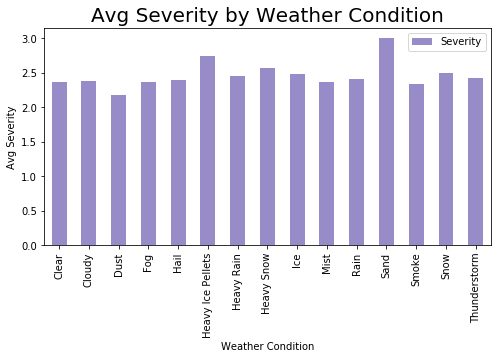

<Figure size 432x288 with 0 Axes>

In [27]:
df_weather_severity_grouped=df_charts[['Weather_Condition','Severity']]

df_weather_severity_grouped=df_weather_severity_grouped.groupby('Weather_Condition').mean()


df_weather_severity_grouped.head()

df_weather_severity_grouped.plot(kind="bar", figsize=(8,4), align='center', alpha=0.5, color= "#311B92" , fontsize=10)


# Set a title for the chart
plt.title("Avg Severity by Weather Condition", fontsize=20)
plt.ylabel('Avg Severity', fontsize=10)
plt.xlabel('Weather Condition', fontsize=10)


plt.show()
plt.tight_layout()

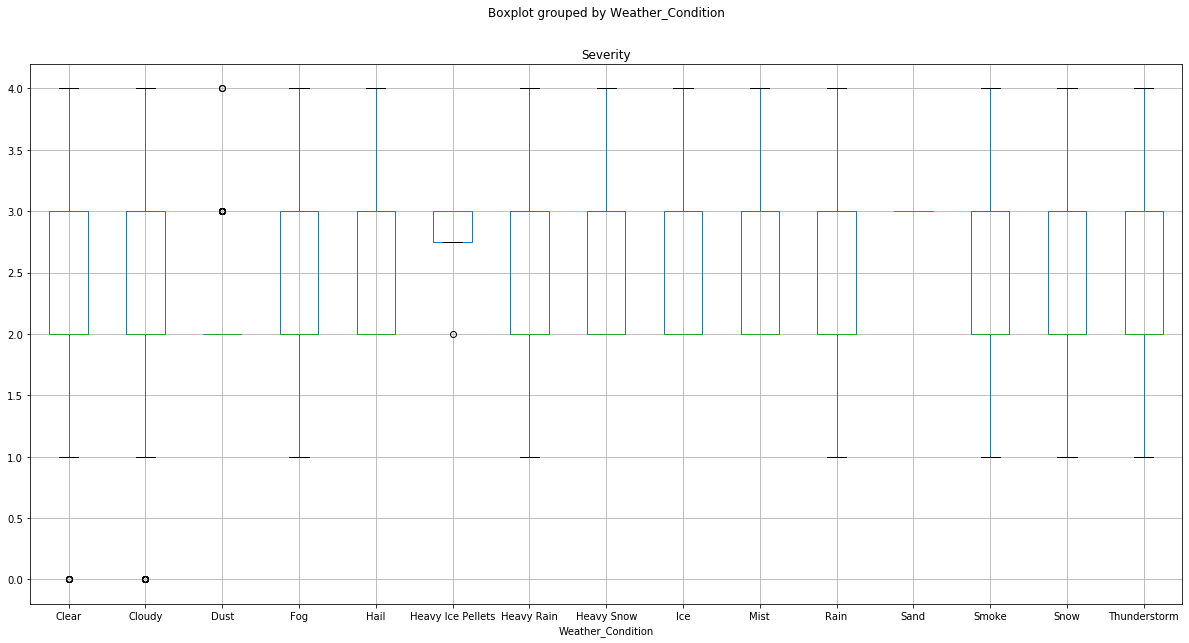

In [28]:
df_charts.boxplot("Severity", by="Weather_Condition", figsize=(20, 10))

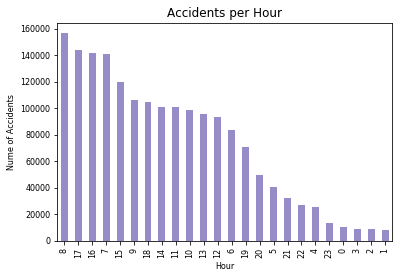

<Figure size 432x288 with 0 Axes>

In [29]:
accidents_per_hour= df_charts['datehour'].value_counts()
accidents_per_hour.plot(kind="bar", figsize=(6,4), align='center', alpha=0.5, color= "#311B92" , fontsize=8)

# Set a title for the chart
plt.title("Accidents per Hour", fontsize=12)
plt.ylabel('Nume of Accidents', fontsize=8)
plt.xlabel('Hour', fontsize=8)

plt.show()
plt.tight_layout()


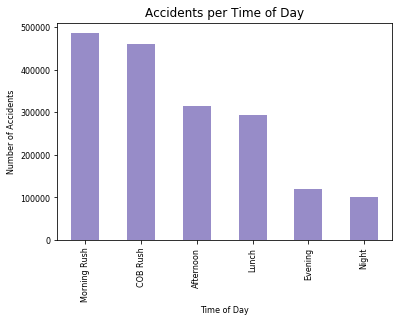

<Figure size 432x288 with 0 Axes>

In [30]:
accidents_per_timeofday= df_charts['TimeOfDay'].value_counts()
accidents_per_timeofday.plot(kind="bar", figsize=(6,4), align='center', alpha=0.5, color= "#311B92" , fontsize=8)

# Set a title for the chart
plt.title("Accidents per Time of Day", fontsize=12)
plt.ylabel('Number of Accidents', fontsize=8)
plt.xlabel('Time of Day', fontsize=8)

plt.show()
plt.tight_layout()

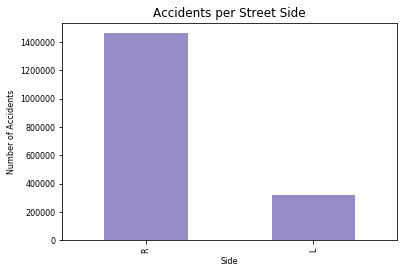

<Figure size 432x288 with 0 Axes>

In [51]:
accidents_side= df_charts['Side'].value_counts()
accidents_side.plot(kind="bar", figsize=(6,4), align='center', alpha=0.5, color= "#311B92" , fontsize=8)

# Set a title for the chart
plt.title("Accidents per Street Side", fontsize=12)
plt.ylabel('Number of Accidents', fontsize=8)
plt.xlabel('Side', fontsize=8)

plt.show()
plt.tight_layout()

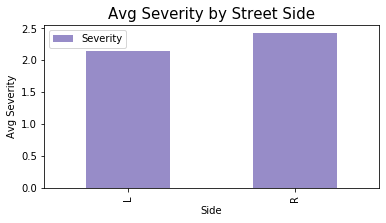

<Figure size 432x288 with 0 Axes>

In [56]:
severity_by_side=df_charts[['Side','Severity']]

severity_by_side=severity_by_side.groupby('Side').mean()



severity_by_side.plot(kind="bar", figsize=(6,3), align='center', alpha=0.5, color= "#311B92" , fontsize=10)


# Set a title for the chart
plt.title("Avg Severity by Street Side", fontsize=15)
plt.ylabel('Avg Severity', fontsize=10)
plt.xlabel('Side', fontsize=10)


plt.show()
plt.tight_layout()

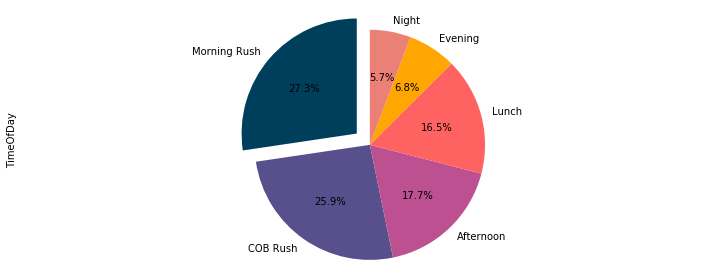

In [31]:
# Create a list of colors (from iWantHue)
colors = ["#003F5C", "#58508D", "#BC5090", "#FF6361", "#FFA600", "#EB8076"]


# Create a pie chart


df_charts['TimeOfDay'].value_counts().plot(kind="pie", colors=colors, autopct='%1.1f%%', startangle=90,
                                           explode=(0.15, 0, 0, 0,0, 0), shadow=False, figsize=(10,4))


# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

In [32]:
#grouop by season and region 
#avergae severity 
#pie chart?

df_weather_region_grouped=df_charts[['Climate_Region','Season','Severity', "diff_minutes"]]

df_weather_region_grouped=df_weather_region_grouped.groupby(['Climate_Region','Season'])
df_weather_region_grouped.mean()


Severity  diff_minutes
Climate_Region Season                        
Central        Fall    2.395323    105.168501
               Spring  2.460905    139.409583
               Summer  2.422482    133.622042
               Winter  2.442764    113.922159
Midwest        Fall    2.483126     91.105199
               Spring  2.514027    106.482031
               Summer  2.506638    110.257067
               Winter  2.521448     87.469069
North Central  Fall    2.184701     50.780159
               Spring  2.171673     60.510379
               Summer  2.181906     57.732234
               Winter  2.214301     58.763380
Northeast      Fall    2.420427     81.085395
               Spring  2.441411    125.405250
               Summer  2.452715    107.947323
               Winter  2.437194     85.467388
Northwest      Fall    2.280477    134.306874
               Spring  2.374565    143.953129
               Summer  2.356928    131.992846
               Winter  2.296475    156.615202
South          Fall    2.256608     66.460273
               Spring  2.268538     79.135466
               Summer  2.268165     78.879255
               Winter  2.271881     70.334244
South East     Fall    2.368085     45.677981
               Spring  2.410101     71.548515
               Summer  2.521552     68.015445
               Winter  2.407068     47.332357
Southeast      Fall    2.351899     77.253535
               Spring  2.349782     97.800159
               Summer  2.379569    102.229872
               Winter  2.362711     82.792520
Southwest      Fall    2.402915     83.958929
               Spring  2.415237    118.337946
               Summer  2.405217    123.249872
               Winter  2.385206     83.106274
West           Fall    2.384790     89.010306
               Spring  2.377461    114.300223
               Summer  2.398012    102.313691
               Winter  2.392283     97.412860

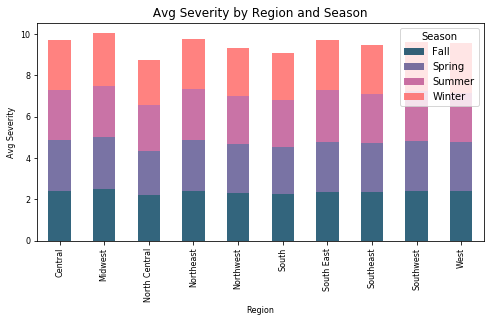

<Figure size 432x288 with 0 Axes>

In [48]:
colors = ["#003F5C", "#58508D", "#BC5090", "#FF6361", "#FFA600", "#EB8076"]

df_weather_region_grouped["Severity"].mean().unstack().plot(kind='bar', stacked=True, color=colors,  figsize=(8,4),
                                                            align='center', alpha=0.8,  fontsize=8)

# Set a title for the chart
plt.title(" Avg Severity by Region and Season ", fontsize=12)
plt.ylabel('Avg Severity', fontsize=8)
plt.xlabel('Region', fontsize=8)

plt.show()
plt.tight_layout()

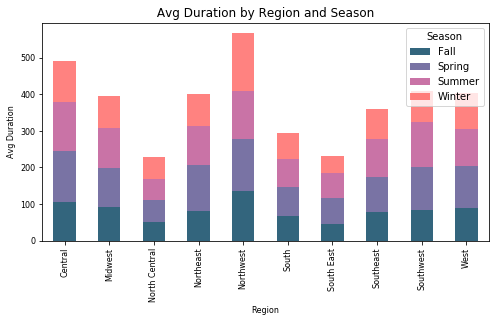

<Figure size 432x288 with 0 Axes>

In [49]:
colors = ["#003F5C", "#58508D", "#BC5090", "#FF6361", "#FFA600", "#EB8076"]
df_weather_region_grouped["diff_minutes"].mean().unstack().plot(kind='bar', stacked=True, color=colors,  figsize=(8,4),
                                                            align='center', alpha=0.8,  fontsize=8)


# Set a title for the chart
plt.title(" Avg Duration by Region and Season ", fontsize=12)
plt.ylabel('Avg Duration', fontsize=8)
plt.xlabel('Region', fontsize=8)

plt.show()
plt.tight_layout()

In [ ]:
accidents_per_hour= df_charts['datehour']
severity_by_hour = df_charts.groupby('datehour').mean()

scatter_plot1= plt.scatter(x= df_charts.datehour,y=accidents_per_hour, marker="o", #s=drivers_rural*9.4,
                        facecolors="gold", edgecolors="black", alpha=.8, linewidths=1)


scatter_plot1
# #Incorporate the other graph properties
# plt.title("Pyber Ride Sharing Data (2016)")
# plt.xlabel("Total Number of Rides (Per City)")
# plt.ylabel("Average Fare ($)")
# plt.grid()
                                                                                             

# # Create a legend and add legend title 
# legend =plt.legend((urban_plot, suburban_plot, rural_plot),("Urban","Suburban", "Rural"), 
#                    loc="upper right", title= "City Types")

In [ ]:

#accident_duration= df_charts['diff_minutes'].value_counts()

# sorted_duration = df_charts.sort_values(by ='diff_minutes', ascending= False)

# accident_duration=df_charts.diff_minutes.value_counts()



# accident_duration[accident_duration < 360].hist(bins = 5)


# accident_duration.plot(kind="bar", figsize=(6,4), align='center', alpha=0.5, color= "#311B92" , fontsize=8)

# # Set a title for the chart
# plt.title("Severity Distribution", fontsize=12)
# plt.ylabel('Accidents', fontsize=8)
# plt.xlabel('Hour', fontsize=8)

# plt.show()
# plt.tight_layout()

#X.to_csv("X.csv",index=False)

#plt.scatter(df_charts.Severity, df_charts.diff_minutes)

In [ ]:
# Build the scatter plots for each city types
urban_plot = plt.scatter(x= ride_id_urban,y=avg_fare_urban, marker="o", s=drivers_urban*9.4,
                         facecolors="coral", edgecolors="black", alpha=.8, linewidths=1)

suburban_plot= plt.scatter(x= ride_id_suburban,y=avg_fare_suburban, marker="o", s=drivers_suburban*9.4,
                           facecolors="skyblue", edgecolors="black", alpha=.8, linewidths=1)

rural_plot= plt.scatter(x= ride_id_rural,y=avg_fare_rural, marker="o", s=drivers_rural*9.4,
                        facecolors="gold", edgecolors="black", alpha=.8, linewidths=1)

#Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
                                                                                             

# Create a legend and add legend title 
legend =plt.legend((urban_plot, suburban_plot, rural_plot),("Urban","Suburban", "Rural"), 
                   loc="upper right", title= "City Types")

#change the size of the circles in the ledgend 
for handle in legend.legendHandles:
    handle.set_sizes([30])


# Incorporate a text label regarding circle size
plt.text(0.93,0.6, "Note:\nCircle size correlates with driver count per city", fontsize=10,
         transform=plt.gcf().transFigure)

# Save Figure - used tight to print the note
plt.savefig("ride_sharing_data.png",bbox_inches="tight", dpi = 300)
plt.show()